<a href="https://colab.research.google.com/github/RJ4RJ/Diabetes_Predictor/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

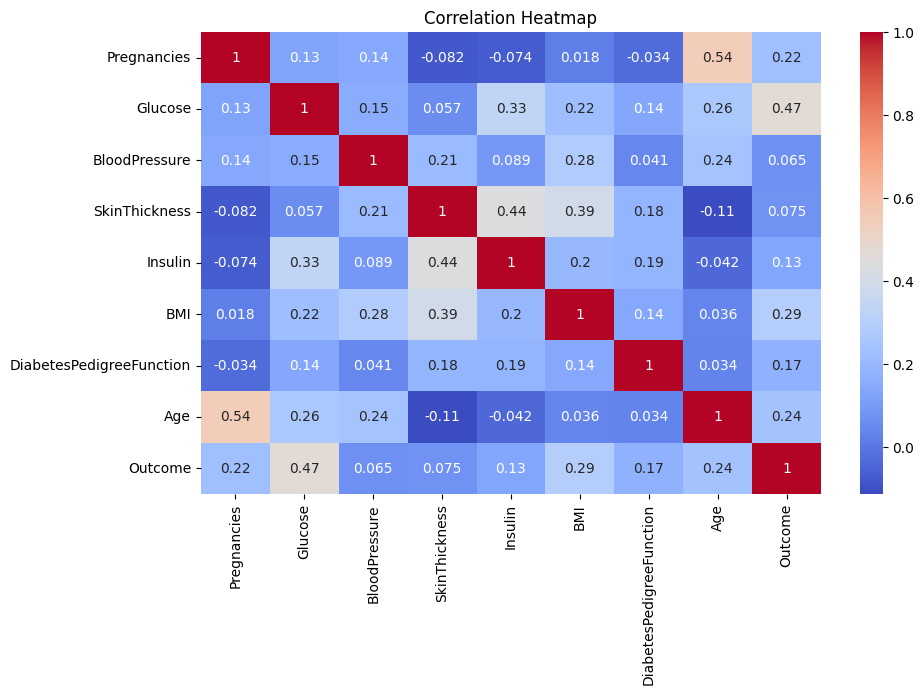

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [11]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
 [[79 20]
 [18 37]]


In [12]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [27]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle

st.title("Diabetes Prediction")


pregnancies = st.number_input("Pregnancies", 0, 20)
glucose = st.number_input("Glucose", 0, 200)
bp = st.number_input("Blood Pressure", 0, 150)
skin_thickness = st.number_input("Skin Thickness", 0, 100)
insulin = st.number_input("Insulin", 0, 900)
bmi = st.number_input("BMI", 0.0, 70.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0, 2.5)
age = st.number_input("Age", 0, 100)


if st.button("Predict"):

    model = pickle.load(open("model.pkl", "rb"))
    scaler = pickle.load(open("scaler.pkl", "rb"))

    input_data = np.array([[pregnancies, glucose, bp, skin_thickness, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)

    prediction = model.predict(input_scaled)

    if prediction[0] == 1:
        st.error("⚠️ Diabetic")
    else:
        st.success("✅ Not Diabetic")


Overwriting app.py


In [28]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [29]:
from google.colab import files
files.upload()


Saving scaler.pkl to scaler (2).pkl
Saving model.pkl to model (2).pkl


{'scaler (2).pkl': b'\x80\x04\x957\x03\x00\x00\x00\x00\x00\x00\x8c\x1bsklearn.preprocessing._data\x94\x8c\x0eStandardScaler\x94\x93\x94)\x81\x94}\x94(\x8c\twith_mean\x94\x88\x8c\x08with_std\x94\x88\x8c\x04copy\x94\x88\x8c\x11feature_names_in_\x94\x8c\x16numpy._core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x08\x85\x94h\x0c\x8c\x05dtype\x94\x93\x94\x8c\x02O8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?t\x94b\x89]\x94(\x8c\x0bPregnancies\x94\x8c\x07Glucose\x94\x8c\rBloodPressure\x94\x8c\rSkinThickness\x94\x8c\x07Insulin\x94\x8c\x03BMI\x94\x8c\x18DiabetesPedigreeFunction\x94\x8c\x03Age\x94et\x94b\x8c\x0en_features_in_\x94K\x08\x8c\x0fn_samples_seen_\x94h\t\x8c\x06scalar\x94\x93\x94h\x15\x8c\x02i8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94bC\x08f\x02\x00\x00\x00\x00\x00\x00\x94\x86\x94R\x94\x8c\x05mean_\x94h\x0bh\x

In [30]:
from pyngrok import conf

conf.get_default().auth_token = "2z7a3n2gO5vD4ZjnPK1OG1QVfp0_2r7enCzeQkRyBtPxkPF1p"


In [31]:
from pyngrok import ngrok


!streamlit run app.py &>/content/log.txt &

public_url = ngrok.connect(8501)
print(f"✅ Your Streamlit app is live at: {public_url}")


✅ Your Streamlit app is live at: NgrokTunnel: "https://1617-34-46-183-219.ngrok-free.app" -> "http://localhost:8501"
